In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
from  sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from warnings import filterwarnings
filterwarnings("ignore")



c:\Users\ahmet\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("psyc.csv")

In [4]:
df.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [5]:
df.agreeableness.value_counts()

6    71
5    69
4    58
7    42
3    27
2    23
1    14
8    11
Name: agreeableness, dtype: int64

In [6]:
opennes_categories = [1,2,3,4,5,6,7,8]
neuro_categories = [1,2,3,4,5,6,7,8,9]
consci_categories = [1,2,3,4,5,6,7,8,9]
agree_categories = [1,2,3,4,5,6,7,8]
extraversion_categories = [1,2,3,4,5,6,7,8]

In [7]:
from pandas import CategoricalDtype


df.openness = df.openness.astype(CategoricalDtype(categories=opennes_categories,ordered=True))
df.neuroticism = df.neuroticism.astype(CategoricalDtype(categories=neuro_categories,ordered=True))
df.conscientiousness = df.conscientiousness.astype(CategoricalDtype(categories=consci_categories,ordered=True))
df.agreeableness = df.agreeableness.astype(CategoricalDtype(categories=agree_categories,ordered=True))
df.extraversion = df.extraversion.astype(CategoricalDtype(categories=extraversion_categories,ordered=True))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             315 non-null    object  
 1   age                315 non-null    int64   
 2   openness           315 non-null    category
 3   neuroticism        315 non-null    category
 4   conscientiousness  315 non-null    category
 5   agreeableness      315 non-null    category
 6   extraversion       315 non-null    category
 7   Personality        315 non-null    object  
dtypes: category(5), int64(1), object(2)
memory usage: 10.8+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

df["gender_"]=lbe.fit_transform(df["gender"])
df["Personality_"]=lbe.fit_transform(df["Personality"])

In [13]:
df.openness = df.openness.astype("int64")
df.neuroticism = df.neuroticism.astype("int64")
df.conscientiousness = df.conscientiousness.astype("int64")
df.agreeableness = df.agreeableness.astype("int64")
df.extraversion = df.extraversion.astype("int64")


In [10]:
df.openness

0      7
1      5
2      5
3      6
4      2
      ..
310    6
311    2
312    7
313    6
314    5
Name: openness, Length: 315, dtype: int64

<AxesSubplot:>

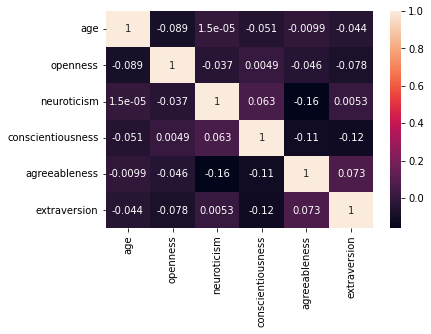

In [14]:
sns.heatmap(df.corr(),annot=True)